# Lesson 24: Practice with Pandas and Altair *solution*

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l24_practice_with_pandas_and_altair_solution.ipynb).*

<br /> <br />

In [1]:
import pandas as pd
import altair as alt

import bootcamp_utils

## Practice 1: Axes with logarithmic scale

Sometimes you need to plot your data with a logarithmic scale. As an example, let's consider the classic genetic switch engineered by Jim Collins and coworkers ([Gardner, et al., *Nature*, **403**, 339, 2000](http://www.nature.com/nature/journal/v403/n6767/full/403339a0.html)). This genetic switch was incorporated into *E. coli* and is inducible by adjusting the concentration of the lactose analog IPTG. The readout is the fluorescence intensity of GFP.

Let's load in some data that have the IPTG concentrations and GFP fluorescence intensity. The data are in the file `~/git/data/collins_switch.csv`. Let's look at it.

In [2]:
!cat data/collins_switch.csv

# Data digitized from Fig. 5a of Gardner, et al., *Nature*, **403**, 339, 2000. The last column gives the standard error of the mean normalized GFP intensity.
[IPTG] (mM),normalized GFP expression (a.u.),sem
0.001000,0.004090,0.003475
0.010000,0.010225,0.002268
0.020000,0.022495,0.004781
0.030000,0.034765,0.003000
0.040000,0.067485,0.006604
0.040000,0.668712,0.087862
0.060000,0.740286,0.045853
0.100000,0.840491,0.058986
0.300000,0.936605,0.026931
0.600000,0.961145,0.093553
1.000000,0.940695,0.037624
3.000000,0.852761,0.059035
6.000000,0.910020,0.051052
10.000000,0.893661,0.042773


It has two rows of non-data. Then, Column 1 is the IPTG concentration, column 2 is the normalized GFP expression level, and the last column is the standard error of the mean normalized GFP intensity. This gives the error bars, which we will look at in the next exercise. For now, we will just plot IPTG versus normalized GFP intensity.

In looking at the data set, note that there are two entries for [IPTG] = 0.04 mM. At this concentration, the switch happens, and there are two populations of cells, one with high expression of GFP and one with low. The two data points represent these two populations of cells.

Now, let's make a plot of IPTG versus GFP.

>1. Load in the data set using Pandas. Make sure you use the `comment` kwarg of pd.read_csv() properly.
2. Make a plot of normalized GFP intensity (y-axis) versus IPTG concentration (x-axis). Be sure you change the columns names of the data frame to handle the forbidden Altair characters (`[`, `]`, `%`, `"`, and `.`). 

Now that you have done that, there are some problems with the plot. It is really hard to see the data points with low concentrations of IPTG. In fact, looking at the data set, the concentration of IPTG varies over four orders of magnitude. When you have data like this, it is wise to plot them on a logarithmic scale. You can specify an axis in a `Chart` to have a logarithmic scale using the `scale=alt.Scale(type='log')` kwarg in your encoding for the *x* or *y* variables. For this data set, it is definitely best to have the x-axis on a logarithmic scale. Remake the plot you just did with the x-axis logarithmically scaled.

### Practice 1: solution

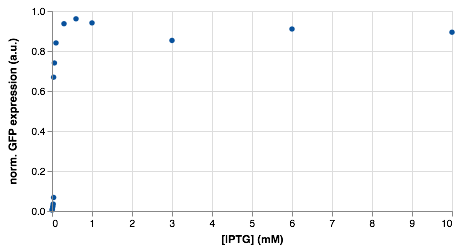

In [3]:
# Load in the data
df = pd.read_csv('data/collins_switch.csv', comment='#')

# Rename columns
df = df.rename(columns={'[IPTG] (mM)': 'iptg (mM)',
                        'normalized GFP expression (a.u.)': 'gfp'})

# Make a chart
alt.Chart(df,
        height=200,
        width=400
    ).mark_point(
        filled=True,
        color='#08519c',
        opacity=1
    ).encode(
        x=alt.X('iptg (mM):Q', title='[IPTG] (mM)'),
        y=alt.Y('gfp:Q', title='norm. GFP expression (a.u.)')
    )

We clearly need the $x$-axis to be on a log scale, so let's remake the plot.

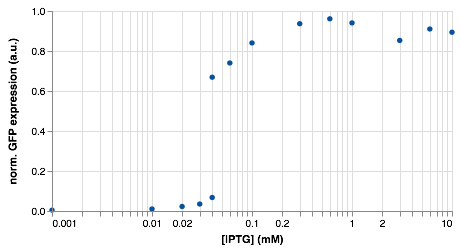

In [4]:
# Make a chart
dots = alt.Chart(df,
        height=200,
        width=400
    ).mark_point(
        filled=True,
        color='#08519c',
        opacity=1
    ).encode(
        x=alt.X('iptg (mM):Q',
                title='[IPTG] (mM)', 
                scale=alt.Scale(type='log')),
        y=alt.Y('gfp:Q', 
                title='norm. GFP expression (a.u.)')
    )

dots

## Practice 2: Plots with error bars

The data set also contains the standard error of the mean, or SEM. The SEM is often displayed on plots as error bars. Now construct the plot with error bars.

>1. Add columns `error_low` and `error_high` to the `DataFrame` containing the Collins data. These will set the bottoms and tops of the error bars. You should base the values in these columns on the standard error of the mean (`sem`). Assuming a Gaussian model the 95% confidence interval is ±1.96 times the s.e.m.
2. Make a plot with the measured expression levels and the error bars.

### Practice 2 solution

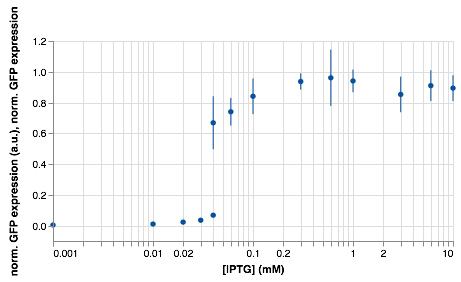

In [5]:
# Add error bars to the DataFrame
df['error_low'] = df['gfp'] - 1.96*df['sem']
df['error_high'] = df['gfp'] + 1.96*df['sem']

# Make the error bar plot
error_bars = alt.Chart(df,
        height=200,
        width=400
    ).mark_rule(
        color='#08519c',
    ).encode(
        x=alt.X('iptg (mM):Q',
                title='[IPTG] (mM)', 
                scale=alt.Scale(type='log')),
        y=alt.Y('error_low:Q', 
                title='norm. GFP expression'),
        y2=alt.Y2('error_high:Q', 
            title='norm. GFP expression')
    )

# Overlay
dots + error_bars